#Máster en Big Data y Data Science: Ciencia e Ingeniería de Datos
### ASIGNATURA: Indexación, búsqueda y análisis en repositorios multimedia
### PARTE: Multimedia (imagen, video)
### Práctica 1: Introducción al diseño de redes neuronales convolucionales con Pytorch mediante Google Colaboratory

---

Autor: Juan C. SanMiguel (juancarlos.sanmiguel@uam.es), Universidad Autónoma de Madrid


# 2. Carga de conjuntos de datos/imágenes (datasets)

## Preparación del entorno de trabajo

A continuación tiene un conjunto de instrucciones que instalan el software necesario para esta parte de la práctica.

Recuerde que este código es compatible con Python 3.

In [ ]:
!pip3 install torch==1.10.0+cu111 torchvision==0.11.0+cu111 torchaudio==0.10.0 -f https://download.pytorch.org/whl/torch_stable.html


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████▌                   | 834.1 MB 1.5 MB/s eta 0:14:57tcmalloc: large alloc 1147494400 bytes == 0x392c2000 @  0x7f3d22c94615 0x58e046 0x4f2e5e 0x4d19df 0x51b31c 0x5b41c5 0x58f49e 0x51b221 0x5b41c5 0x58f49e 0x51837f 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4ba70a 0x538136 0x590055 0x51b180 0x5b41c5 0x58f49e 0x51837f 0x5b41c5 0x58f49e 0x51740e 0x58f2a7 0x517947 0x5b41c5 0x58f49e
     |███████████████▉                | 1055.7 MB 1.3 MB/s eta 0:13:37tcmalloc: large alloc 1434370048 bytes == 0x7d918000 @  0x7f3d22c94615 0x58e046 0x4f2e5e 0x4d19df 0x51b31c 0x5b41c5 0x58f49e 0x51b221 0x5b41c5 0x58f49e 0x51837f 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4ba70a 0x538136 0x590055 0x51b180 0x5b41c5 0x58f49e 0x51837f 0x5b41c5 0x58f49e 0x51740e 0x58f2a7 0x517947 0x5b41c5 0x58f49e
     |█████

## Datasets por defecto
Una de las ventajas de Pytorch es que proporciona funciones para manejar datasets de manera estándar. Debido a su simplicidad, existen multitud de extensiones para nuevos datasets. Puede encontrar un listado de los principales datasets soportados en:

https://github.com/pytorch/vision/tree/master/torchvision/datasets (más en http://github.com)

En esta parte de la práctica vamos a estudiar varias operaciones:


1.   Como cargar un dataset (entrenamiento)
2.   Como cargar un dataset (test o validacion)
3.   Como mostrar los datos de un dataset


### CIFAR10: descripción

Como ejemplo, vamos a utilizar el dataset CIFAR10 https://www.cs.toronto.edu/~kriz/cifar.html

CIFAR-10 es un dataset con las siguientes caracteristicas:
*   60,000 imágenes a color RGB (con resolución 32x32)
*   10 clases (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck)
*   Datos están divididos entre entrenamiento/train (50K) y test/validation (10K).



### CIFAR10: descarga

A continuación se muestran las instrucciones para descargar el dataset en el directorio "download_dir" utilizando la funcionalidad del paquete *torchvision.datasets*

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor()])

download_dir = './data' #download directory
trainset = torchvision.datasets.CIFAR10(root=download_dir, train=True, download=True, transform=transform) #train set
testset = torchvision.datasets.CIFAR10(root=download_dir, train=False, download=True, transform=transform) #test set

print('Train dataset with ' + str(len(trainset)) + ' images')
print('Test dataset with ' + str(len(testset)) + ' images')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Train dataset with 50000 images
Test dataset with 10000 images


### CIFAR10: conversión a formato Pytorch

Una vez descargado, el dataset necesita ser convertido a un formato manejable por Pytorch. Para ello se dispone de los *DataLoader* que realizan esta tarea.

Los parámetros relevantes de esta operación son:


*   **batch_size**: agrupamiento de los datos que se utilizará para entrenamiento y validación.
*   **shuffle**: FLAG que indica si este agrupamiento de realiza de manera aleatoria o secuencial.

Adicionalmente a la carga, también se deben definir manualmente las clases que tiene el dataset

In [ ]:
#number of samples/images per group
batch_size=6

#training dataset
trainloader = torch.utils.data.DataLoader(trainset, batch_size, shuffle=True, num_workers=2)

#test dataset
testloader = torch.utils.data.DataLoader(testset, batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print('Loaders done.')
print('Each batch with ' + str(batch_size) + ' samples/images')
print('Train dataset with ' + str(len(trainloader)) + ' batches')
print('Test dataset with ' + str(len(testloader)) + ' batches')

Loaders done.
Each batch with 6 samples/images
Train dataset with 8334 batches
Test dataset with 1667 batches


### CIFAR10: visualización

Por último, se recomienda visualizar los datos para verificar su correctitud.

Para ello vamos a utilizar la librería *matplotlib* y *numpy*. No obstante se pueden utilizar otras alternativas para manejo de imágenes como *OpenCV* o similares.

Primeramente vamos a crear una función que nos permita pintar una imagen


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

Posteriormente, vamos a coger aleatoriamente un *batch* para visualizarlo. 

Aunque podríamos visualizar las imágenes por separado, es más conveniente concaternarlas y posteriormente ver el resultado.

Ejecute tantas veces como desee el siguiente código para visualizar distintas imágenes.

  cat  deer horse horse  bird  bird


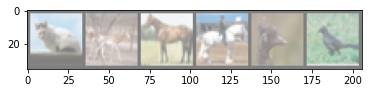

In [ ]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#concatenate images
imgconcat = torchvision.utils.make_grid(images)

# show images
imshow(imgconcat)
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

## Datasets genéricos
Para datasets no inicialmente considerados en Pytorch, también se proporciona una funcionalidad básica que permite operar rápidamente con datasets. En esta sección vamos a revisar las operaciones anteriormente comentadas.


###Scene15: descripcion
Como ejemplo, vamos a utilizar el dataset Scene15 http://www-vpu.eps.uam.es/~jcs/pub/Scene15.zip

CIFAR-10 es un dataset con las siguientes caracteristicas:
*   4500 imágenes a color RGB (con resolución aproximada 220x220)
*   Datos están divididos entre entrenamiento/train (1500) y test/validation (3000).
*   15 clases (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck)

### Scene15: descarga

A continuación se muestran las instrucciones para descargar el dataset en el directorio "download_dir" utilizando la funcionalidad del paquete *torchvision.datasets*

In [ ]:
import subprocess
import os

download_dir = '/content/data' #download directory
out=subprocess.call(["mkdir",download_dir])#create directory
os.chdir(download_dir) #move to directory

#download file
!wget http://www-vpu.eps.uam.es/~jcs/bigdata/Scene15.zip

#unzip file
!unzip -o -q Scene15.zip -d .

#display directory
!ls Scene15
!ls Scene15/train
!ls Scene15/val

--2022-09-26 13:20:41--  http://www-vpu.eps.uam.es/~jcs/bigdata/Scene15.zip
Resolving www-vpu.eps.uam.es (www-vpu.eps.uam.es)... 150.244.56.90
Connecting to www-vpu.eps.uam.es (www-vpu.eps.uam.es)|150.244.56.90|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86395596 (82M) [application/zip]
Saving to: ‘Scene15.zip’

Scene15.zip         100%[===================>]  82.39M  18.3MB/s    in 11s     

2022-09-26 13:20:52 (7.17 MB/s) - ‘Scene15.zip’ saved [86395596/86395596]

train  val
Bedroom  Highway     Kitchen	 Office       Street
Coast	 Industrial  LivingRoom  OpenCountry  Suburb
Forest	 InsideCity  Mountain	 Store	      TallBuilding
Bedroom  Highway     Kitchen	 Office       Street
Coast	 Industrial  LivingRoom  OpenCountry  Suburb
Forest	 InsideCity  Mountain	 Store	      TallBuilding


### Scene15: lectura de disco
Tras descargar y descomprimir el fichero, se debe proceder a leer de disco las imágenes correspondientes.

Como normal general, se considera que el fichero zip tiene dos subcarpetas:
*   Carpeta *train* con imágenes de entrenamiento
*   Carpeta *val* con imágenes de test/validacion

En cada carpeta, existirá un número de sub-carpetas acorde al número de clases del dataset. En cada carpeta existirán imágenes asociadas a cada categoría. 

Para *Scene15*, la estructura de la carpeta *train* es la siguiente:

  *Scene15/Bedroom*

  *Scene15/Coast*

  *Scene15/Forest*

  *Scene15/Highway*

  ...

  *Scene15/Suburb*

  *Scene15/TallBuilding*
  

Las utilidades de Pytorch permite cargar estos datos de modo sencillo y rápido con las siguientes instrucciones. Obsérvese que se cargan varias carpetas (*train* y *val*) en una sola instrucción.

In [ ]:
import os
from torchvision import datasets
import torchvision.transforms as transforms

Resizing_factor = (224,224)
transform = transforms.Compose([transforms.Resize(Resizing_factor),
                                transforms.ToTensor()])

#path to the downloaded dataset
dataset_dir = download_dir + '/Scene15/'

#list & load images
image_datasets = {x: datasets.ImageFolder(os.path.join(dataset_dir, x), transform) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

print('Images resized to size ' + str(Resizing_factor))
print('Train dataset with ' + str(len(image_datasets['train'])) + ' images')
print('Test dataset with ' + str(len(image_datasets['val'])) + ' images')

Images resized to size (224, 224)
Train dataset with 1500 images
Test dataset with 2985 images


### Scene15: conversión a formato Pytorch

Una vez descargado, el dataset necesita ser convertido a un formato manejable por Pytorch. Para ello se dispone de los *DataLoader* que realizan esta tarea.

Los parámetros relevantes de esta operación son:


*   **batch_size**: agrupamiento de los datos que se utilizará para entrenamiento y validación.
*   **shuffle**: FLAG que indica si este agrupamiento de realiza de manera aleatoria o secuencial.

Adicionalmente a la carga, también se deben definir manualmente las clases que tiene el dataset

In [ ]:
import torch

#number of samples/images per group
batch_size=6

#load & convert images to tensors in Python
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size, shuffle=True, num_workers=2) for x in ['train', 'val']}

#we create some extra variables for compability with the previous case for CIFAR10
trainloader = dataloaders['train']
testloader = dataloaders['val']
classes = image_datasets['train'].classes

print('Loaders done.')
print('Each batch with ' + str(batch_size) + ' samples/images')
print('Train dataset with ' + str(len(trainloader)) + ' batches')
print('Test dataset with ' + str(len(testloader)) + ' batches')
print('Available classes:')
print(classes)

Loaders done.
Each batch with 6 samples/images
Train dataset with 250 batches
Test dataset with 498 batches
Available classes:
['Bedroom', 'Coast', 'Forest', 'Highway', 'Industrial', 'InsideCity', 'Kitchen', 'LivingRoom', 'Mountain', 'Office', 'OpenCountry', 'Store', 'Street', 'Suburb', 'TallBuilding']


### Scene15: visualización

De manera similar al caso anterior, procedemos a visualizar los datos cargados en un *batch* aleatorio. Utilizaremos la librería *matplotlib* y *numpy*. 

NOTA: si al ejecutar este código obtiene un error del tipo:

```
Image.register_extensions(TiffImageFile.format, [".tif", ".tiff"])
AttributeError: 'module' object has no attribute 'register_extensions'
```
Esto se debe al uso incorrecto de la librería *Pillow*. Para solucionarlo, restablezca el *runtime* (en el menu "Runtime"->"Restart Runtime") y vuelva a ejecutar las instrucciones de descarga y conversión del dataset.

LivingRoom Kitchen TallBuilding Street OpenCountry TallBuilding


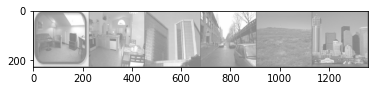

In [ ]:
# function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#concatenate images
imgconcat = torchvision.utils.make_grid(images)

# show images
imshow(imgconcat)
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

## Bonus: transformaciones de los datos

En el entrenamiento, un factor importante es la cantidad y calidad de los datos/imágenes utilizados. 

En esta sección nos vamos a centrar en modificar los datos de entrada para estandarizar su tamaño/color (*Normalization*) y para aumentar la cantidad de imágenes existentes (*Data Augmentation*). Por defecto, Pytorch proporciona esta funcionalidad mediante ``transforms``.

Puede consultar ayuda adicional en http://pytorch.org/docs/master/torchvision/transforms.html

### Transformaciones de una imagen
En el siguiente código obtenemos una imagen sobre la que aplicaremos diversas transformaciones.

Store


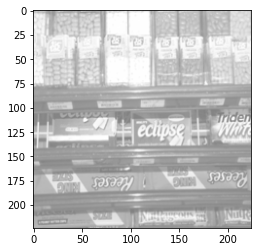

In [ ]:
#load a sample batch from previous section
dataiter = iter(trainloader)
images, labels = dataiter.next()

#display first image of the batch
imshow(images[0])
print ('%5s' % classes[labels[0]])

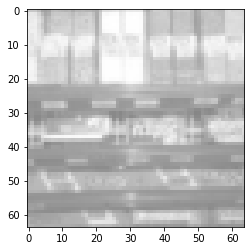

In [ ]:
#resizing transform
import torchvision.transforms as transforms

Resizing_factor = (64,64)
transform = transforms.Compose([transforms.Resize(Resizing_factor), transforms.ToTensor()])

to_pil_image = transforms.ToPILImage()

img = to_pil_image(images[0])
imtran = transform(img)
imshow(imtran)

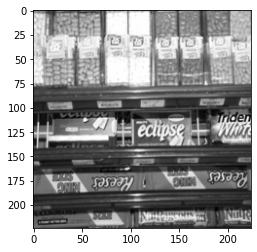

In [ ]:
#normalizing transform
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])

to_pil_image = transforms.ToPILImage()

img = to_pil_image(images[0])
imtran = transform(img)
imshow(imtran)

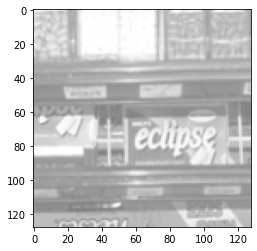

In [ ]:
#center crop transform
import torchvision.transforms as transforms

Resizing_factor = (128,128)
transform = transforms.Compose([transforms.CenterCrop(Resizing_factor), 
                                transforms.ToTensor()])

to_pil_image = transforms.ToPILImage()

img = to_pil_image(images[0])
imtran = transform(img)
imshow(imtran)

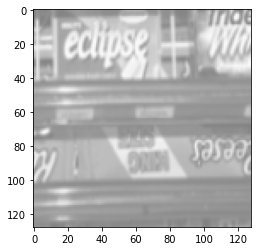

In [ ]:
#random center crop transform
import torchvision.transforms as transforms

Resizing_factor = 128 #square factor
transform = transforms.Compose([transforms.RandomResizedCrop(Resizing_factor), transforms.ToTensor()])

to_pil_image = transforms.ToPILImage()

img = to_pil_image(images[0])
imtran = transform(img)
imshow(imtran)

In [ ]:
#random horizontal flip transform
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.RandomHorizontalFlip(), transforms.ToTensor()])

to_pil_image = transforms.ToPILImage()

img = to_pil_image(images[0])
imtran = transform(img)
imshow(imtran)

### Composicion de transformaciones

En Pytorch es bastante sencillo combinar distintas transformaciones sobre una imagen. Utilizando la función ``Compose``, generamos una secuencia de transformaciones aplicadas sobre la imagen.

Como norma general, siempre aplique la transformaciones:

```
transforms.ToTensor()
transforms.Normalize(mean, std)

```
entre las últimas transformaciones de su transformación compuesta.


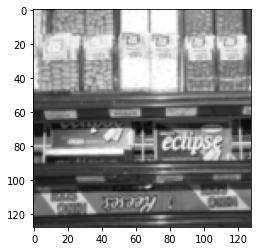

In [ ]:
#random center crop transform
import torchvision.transforms as transforms

Resizing_factor = 128 #square factor
transform = transforms.Compose([ transforms.RandomResizedCrop(Resizing_factor), 
                                transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])

to_pil_image = transforms.ToPILImage()

img = to_pil_image(images[0])
imtran = transform(img)
imshow(imtran)

### Transformaciones sobre un dataset

Para aplicar una serie de transformaciones sobre un dataset, tendremos que hacerlo en el momento de convertir las imágenes a datos de Pytorch.

Como **normal general**, las imágenes han de homogeneizarse (tamaño y rango/normalización) tanto en *train* como en *test*.

El siguiente código muestra un ejemplo de redimensionado y normalización aplicado al conjunto de train/test.

In [ ]:
# Dataset Scene15

#we define two transformations for 'train' & 'test' or 'val'
Resizing_factor = (64,64)
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(), # data augmentation: random horizontal flip
        transforms.Resize(Resizing_factor), #must be the same in train & test
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #must be the same in train & test
    ]),
    'val': transforms.Compose([
        transforms.Resize(Resizing_factor), #must be the same in train & test
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #must be the same in train & test
    ]),
}

#path to the downloaded dataset
dataset_dir = download_dir + '/Scene15/'

#list & load images
image_datasets = {x: datasets.ImageFolder(os.path.join(dataset_dir, x), data_transforms) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

print('Train dataset with ' + str(len(image_datasets['train'])) + ' images')
print('Test dataset with ' + str(len(image_datasets['val'])) + ' images')

Train dataset with 1500 images
Test dataset with 2985 images
